## Portfolio Optimization

Given the historical series of a set of securities (SP500 included), you are asked to:

* find the best set of 10 securities to build a portfolio according to CAPM and justify your choice;
* find the Markowitz portfolio;
* draw efficient frontier of the risky portfolio and the CAL;
* find the market portfolio (the one maximizing the Sharpe Ratio);
* compare and comment the composition of the Sharpe portfolio and the one obtained with CAPM.

The inputs are:

* historical series file;
* risk-free rate.

### Notes and hints

Numerical results must be presented to the examining committee during a presentation in which the candidates will also explain the theoretical framework of the portfolio optimization models.

In [51]:
import pandas as pd

rf = 0.03

df = pd.read_csv("proj8.csv", index_col="date")
print (df.head())

                  SP500         AAP   ABMD        AOS        APA        ATO  \
date                                                                          
27/03/2014  1849.040039  123.163696  25.77  21.684981  77.581405  41.977775   
28/03/2014  1857.619995  123.919241  25.70  21.986826  78.469886  42.096562   
31/03/2014  1872.339966  125.758395  26.04  22.049112  78.403723  43.065140   
01/04/2014  1885.520020  126.503998  26.20  22.216804  79.169329  42.891527   
02/04/2014  1890.900024  126.116285  26.00  22.427617  79.613569  43.311853   

                 CBOE        COG        CTL    DVA  ...        NOV        PNW  \
date                                                ...                         
27/03/2014  53.824369  32.946551  25.138284  68.39  ...  63.031305  47.654249   
28/03/2014  53.128693  33.330682  25.207706  68.45  ...  64.390917  47.243286   
31/03/2014  53.938727  33.370080  25.331122  68.85  ...  64.556724  47.794151   
01/04/2014  53.671892  33.764059  25.5162

In [52]:
daily_returns = df.pct_change()
rm = daily_returns['SP500'].mean()

In [55]:
import numpy as np
betas = {}
alphas = {}
for d in df.columns:
    if d == "SP500":
        continue
    betas[d], alphas[d] = np.polyfit(daily_returns.iloc[1:]['SP500'],
                                 daily_returns.iloc[1:][d], 1)

chosen = []
for i, k in enumerate(sorted(alphas.items(), key=lambda x: x[1], reverse=True)):
    if i < 10:
        chosen.append(k[0])
    print (k[0], k[1])
    
for k in sorted(betas.items(), key=lambda x: x[1], reverse=True):
    print (k[0], k[1])

ABMD 0.0023403765776466193
IPGP 0.000951585710622343
HII 0.000708469722244493
AOS 0.000704403233540146
CBOE 0.0006248109425752492
ATO 0.0005403824108852083
NI 0.0004896528714011218
ETFC 0.0004473379088748245
PNW 0.0003933338176662275
IRM 0.0002825551591147275
NCLH 0.0002458874632280896
FLIR 0.00015367492547958765
IFF 0.00015351149559347313
TAP 0.00010481457928419741
FFIV 6.679757413383137e-05
SEE 5.990493089583329e-05
UNM 3.969090247819882e-05
LNC -1.0026567403624467e-05
WU -4.9650331235825403e-05
PVH -5.687581133127646e-05
XRAY -0.00011069113086256016
HSIC -0.00012850714057728794
AAP -0.00019511457760030938
JNPR -0.00022741440724300264
DVA -0.000233799819993027
MYL -0.00039823743186035267
IVZ -0.0004738007943852619
COG -0.00047895032925550585
QCOM -0.0004974981181496827
CTL -0.000640709942504993
PRGO -0.0007210036470330542
NOV -0.0007420823097424855
MOS -0.0008034521937427383
FTI -0.0008442864665095059
DVN -0.0009088991823244241
APA -0.0009698589768277599
NBL -0.001033628100582931
DVN

In [56]:
print (chosen)

['ABMD', 'IPGP', 'HII', 'AOS', 'CBOE', 'ATO', 'NI', 'ETFC', 'PNW', 'IRM']


In [62]:
all = list(df.columns)
all.remove("SP500")
print (all)

['AAP', 'ABMD', 'AOS', 'APA', 'ATO', 'CBOE', 'COG', 'CTL', 'DVA', 'DVN', 'ETFC', 'FFIV', 'FLIR', 'FTI', 'HII', 'HSIC', 'IFF', 'IPGP', 'IRM', 'IVZ', 'JNPR', 'LNC', 'MOS', 'MYL', 'NBL', 'NCLH', 'NI', 'NOV', 'PNW', 'PRGO', 'PVH', 'QCOM', 'SEE', 'TAP', 'UNM', 'WU', 'XRAY']


In [63]:
portfolio = df[chosen]
portfolio = df[all]
daily_returns = portfolio.pct_change()
returns = 252*daily_returns.mean()
covariance = 252*daily_returns.cov()

print (returns)
print (covariance)

AAP     0.032344
ABMD    0.693980
AOS     0.289830
APA    -0.106440
ATO     0.185276
CBOE    0.203085
COG    -0.019959
CTL    -0.066344
DVA     0.011587
DVN    -0.073567
ETFC    0.263772
FFIV    0.111186
FLIR    0.128557
FTI    -0.089280
HII     0.274255
HSIC    0.049118
IFF     0.130178
IPGP    0.354401
IRM     0.152292
IVZ     0.027478
JNPR    0.041050
LNC     0.149540
MOS    -0.093805
MYL     0.013515
NBL    -0.127197
NCLH    0.171732
NI      0.183202
NOV    -0.076251
PNW     0.141794
PRGO   -0.095204
PVH     0.080893
QCOM   -0.021795
SEE     0.113467
TAP     0.104604
UNM     0.126286
WU      0.087985
XRAY    0.049053
dtype: float64
           AAP      ABMD       AOS       APA       ATO      CBOE       COG  \
AAP   0.098080  0.017338  0.016852  0.018928  0.008539  0.008979  0.013933   
ABMD  0.017338  0.181795  0.024938  0.014443  0.006647  0.011801  0.007113   
AOS   0.016852  0.024938  0.049280  0.027218  0.008685  0.011119  0.020278   
APA   0.018928  0.014443  0.027218  0.151948

In [65]:
from scipy.optimize import minimize

def markowitz(w, cov):
    return w.T.dot(cov.dot(w))

def sum_weights(w):
    return sum(w) - 1

const = ({'type':'eq', 'fun':sum_weights},)
bounds = [(0, 1) for _ in range(len(all))]
weights = [1/len(all) for _ in range(len(all))]

opts = minimize(markowitz, weights, args=(covariance,),
               constraints=const, bounds=bounds)
print (opts)

     fun: 0.011827382262744945
     jac: array([0.0236198 , 0.02552637, 0.02621602, 0.02687801, 0.02379934,
       0.0236576 , 0.02377169, 0.02385559, 0.02367598, 0.03072693,
       0.03027768, 0.02361511, 0.02353712, 0.02462817, 0.02359972,
       0.02372282, 0.02379914, 0.02627894, 0.02523903, 0.03227899,
       0.02351082, 0.02975528, 0.02409035, 0.02686061, 0.0270557 ,
       0.02531209, 0.0247545 , 0.02364517, 0.02345273, 0.02351194,
       0.0236676 , 0.02371706, 0.02641484, 0.02385   , 0.02350451,
       0.02370194, 0.02372447])
 message: 'Optimization terminated successfully.'
    nfev: 664
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([6.28243844e-03, 0.00000000e+00, 0.00000000e+00, 3.83536519e-18,
       1.33573458e-01, 2.03527069e-01, 8.38509265e-03, 1.63134827e-02,
       8.22777929e-02, 2.48011247e-18, 2.79182059e-18, 2.57111462e-02,
       3.34015584e-02, 0.00000000e+00, 7.07751124e-03, 3.85719941e-02,
       3.34430131e-02, 2.73761049e-18, 8.843023

In [70]:
def efficient_frontier(w, ret, target):
    return np.sum(w*ret) - target

points = []
for t in np.arange(0.01, 0.5, 0.01):
    const = ({'type':'eq', 'fun':sum_weights},
             {'type':'eq', 'fun':efficient_frontier, 'args':(returns, t)})
    bounds = [(0, 1) for _ in range(len(all))]
    weights = [1/len(all) for _ in range(len(all))]

    opts = minimize(markowitz, weights, args=(covariance,),
                   constraints=const, bounds=bounds)
    points.append([np.sqrt(opts.fun), t])

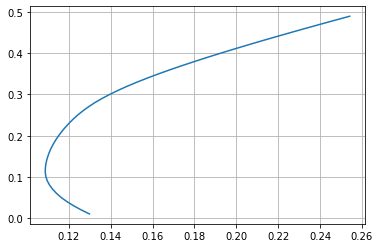

In [76]:
from matplotlib import pyplot as plt

points = np.array(points)
plt.plot(points[:, 0], points[:, 1])
plt.grid(True)
plt.show()

In [84]:
def efficient_frontier_rf(w, ret, target, r0):
    return np.sum(w[:-1]*ret) + r0*w[-1] - target

def markowitz_rf(w, cov):
    return w[:-1].T.dot(cov.dot(w[:-1]))

points_rf = []
for t in np.arange(0.03, 0.5, 0.01):
    const = ({'type':'eq', 'fun':sum_weights},
             {'type':'eq', 'fun':efficient_frontier_rf, 'args':(returns, t, rf)})
    bounds = [(0, 1) for _ in range(len(all)+1)]
    weights = [1/(len(all)+1) for _ in range(len(all)+1)]

    opts = minimize(markowitz_rf, weights, args=(covariance,),
                   constraints=const, bounds=bounds)
    points_rf.append([np.sqrt(opts.fun), t])

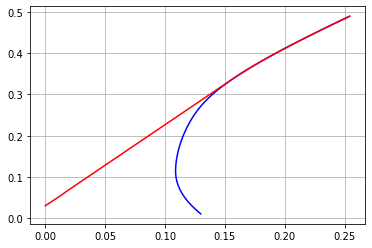

In [85]:
points_rf = np.array(points_rf)
plt.plot(points[:, 0], points[:, 1], color='blue')
plt.plot(points_rf[:, 0], points_rf[:, 1], color='red')
plt.grid(True)
plt.show()

In [86]:
def sharpe_ratio(w, ret, cov, r0):
    sigma = np.sqrt(w.T.dot(cov.dot(w)))
    Rp = np.sum(w*ret)
    return -(Rp-r0)/sigma

const = ({'type':'eq', 'fun':sum_weights},)
bounds = [(0, 1) for _ in range(len(all))]
weights = [1/len(all) for _ in range(len(all))]

opts = minimize(sharpe_ratio, weights, args=(returns, covariance, rf),
               constraints=const, bounds=bounds)
print (opts)

     fun: -1.9675343078178205
     jac: array([ 0.81468271, -0.19069923, -0.19152178,  1.83194716, -0.19142662,
       -0.19148469,  1.01364633,  1.42518213,  0.80761507,  1.75216028,
        0.05779018,  0.62655891,  0.22607549,  1.66344009, -0.19189493,
        0.70026281,  0.20832238, -0.19138922,  0.13051669,  1.49796902,
        1.04075858,  0.56926823,  1.68879113,  1.34303878,  1.90537836,
        0.23324846, -0.19136851,  1.2812673 , -0.12679192,  1.67851144,
        0.56794953,  1.22212805,  0.58102596,  0.31659386,  0.29738557,
        0.6849463 ,  0.71434163])
 message: 'Optimization terminated successfully.'
    nfev: 670
     nit: 17
    njev: 17
  status: 0
 success: True
       x: array([1.23637869e-16, 2.23044615e-01, 1.28234098e-01, 0.00000000e+00,
       2.37796668e-01, 1.76690360e-01, 0.00000000e+00, 0.00000000e+00,
       1.17837227e-15, 0.00000000e+00, 7.77885830e-16, 1.48217690e-15,
       3.32810997e-16, 0.00000000e+00, 9.28464196e-02, 0.00000000e+00,
       1.27

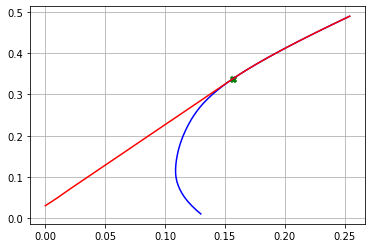

In [88]:
p = (np.sqrt(opts.x.T.dot(covariance.dot(opts.x))), np.sum(opts.x*returns))

plt.plot(points[:, 0], points[:, 1], color='blue')
plt.plot(points_rf[:, 0], points_rf[:, 1], color='red')
plt.scatter(p[0], p[1], marker='X', color='green')
plt.grid(True)
plt.show()

In [68]:
for i, x in enumerate(opts.x):
    if x > 0.01:
        print (all[i], x)

ABMD 0.22304461540085396
AOS 0.1282340979682666
ATO 0.23779666780968786
CBOE 0.17669035995306812
HII 0.09284641964742776
IPGP 0.08908655237897345
NI 0.052301286841723714
